<img src="./files/universidad-nebrija.jpg" alt="Logo Nebrija" align="right" width=200>


<h2><font color="#004D7F" size=4>Lenguajes de Programación</font></h2>

<h1><font color="#004D7F" size=5>Algoritmo de Deutsch y Deutsch-Jozsa</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>José Javier Paulet González</font><br>
<font color="#004D7F" size=3>28/02/2024</font><br>
<font color="#004D7F" size=3>Universidad Antonio de Nebrija</font>

</div>
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $

---

<h1><font color="#004D7F" size=15>Algoritmo de Deutsch</font></h1>

 - Determina si una función es constante o balanceada.

 - Evalúa funciones de una sola entrada binaria y una sola salida binaria.
 
 - La función es constante si obtenemos como resultado un **0** en el qubit de entrada y es balanceada si obtenemos un **1**.


<h1><font color="#003D7F" size=5>Pasos del algoritmo</font></h1>

Consiste en:
1. Generación de la superposición de estados
2. La aplicación del operador Oráculo.
3. La aplicación de puertas Hadamard.
    
<img src="./files/esquema-deutsch.png" alt="Circuito Deutsch" align="center">

<h1><font color="#003D7F" size=5>Ejercicio</font></h1>

Evaluar si la siguiente función se trata de una función constante o balanceada:

<h1 style="text-align: center">$f(x)=\overline{x}$</h1>

¿Cuántos Qubits son necesarios para el operador cuántico que representa $f(x)$?

La función es:
<h1 style="text-align: center">
$f:  B^{1} \longrightarrow B^{1}$
</h1>

<h1 style="text-align: center">
    $x \leadsto \overline{x}$
</h1>

Por lo tanto...

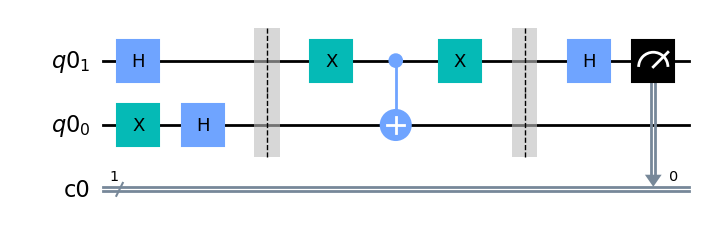

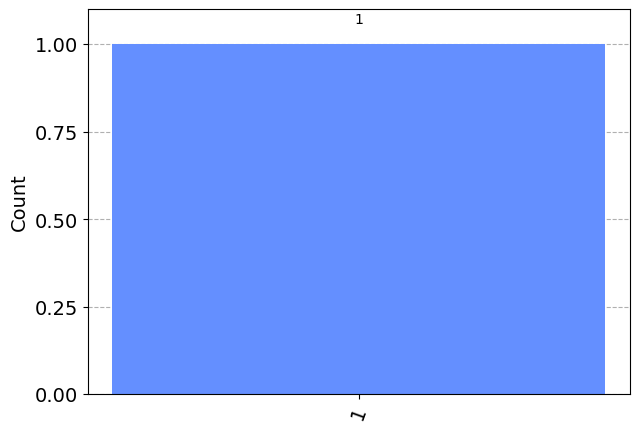

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram
import warnings
warnings.filterwarnings("ignore")

#Creamos el operador oráculo
qreg = QuantumRegister(2)
creg = ClassicalRegister(1)
oraculo = QuantumCircuit(qreg,creg,name="Oracle")

oraculo.barrier()
oraculo.x(qreg[1])
oraculo.cx(qreg[1],qreg[0])
oraculo.x(qreg[1])
oraculo.barrier()

#Creamos el circuito
circ_deutsch = QuantumCircuit(qreg,creg)
circ_deutsch.x(0)
circ_deutsch.h(range(2))

circ_deutsch.compose(oraculo,qreg,inplace=True)

circ_deutsch.h(1)

circ_deutsch.measure(qreg[1],creg[0])

#Mostramos el circuito
display(circ_deutsch.draw("mpl",reverse_bits=True))

#Ejecutamos el circuito y visualizamos los resultados
job = execute(circ_deutsch,Aer.get_backend("qasm_simulator"),shots=1).result()
plot_histogram(job.get_counts())


Como podemos ver la función es...

<h1><font color="#003D7F" size=5>Ejercicio</font></h1>

Evaluar si la siguiente función se trata de una función constante o balanceada:

<h1 style="text-align: center">$f(x)=x\vee\overline{x}$</h1>

La función es:
<h1 style="text-align: center">
$f:  B^{1} \longrightarrow B^{1}$
</h1>

<h1 style="text-align: center">
    $x \leadsto x\vee\overline{x}$
</h1>

Por lo tanto...

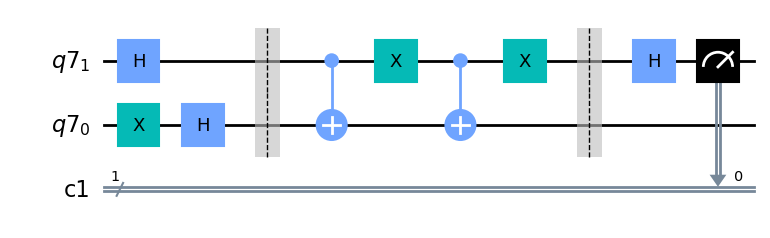

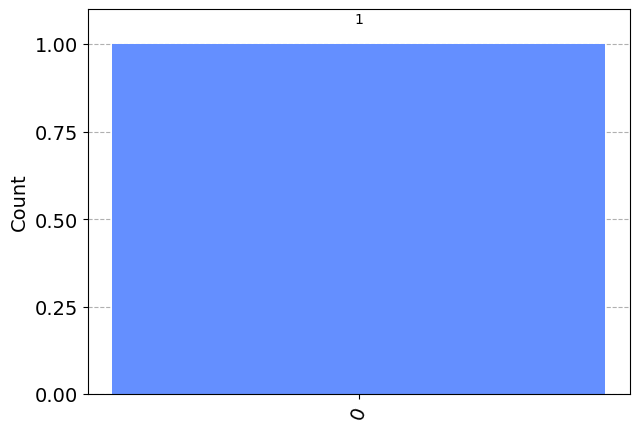

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram

#Creamos el operador oráculo
qreg = QuantumRegister(2)
creg = ClassicalRegister(1)
oraculo = QuantumCircuit(qreg,creg,name="Oracle")

oraculo.barrier()
oraculo.cx(qreg[1],qreg[0])
oraculo.x(qreg[1])
oraculo.cx(qreg[1],qreg[0])
oraculo.x(qreg[1])
oraculo.barrier()

#Creamos el circuito
circ_deutsch = QuantumCircuit(qreg,creg)
circ_deutsch.x(0)
circ_deutsch.h(range(2))

circ_deutsch.compose(oraculo,qreg,inplace=True)

circ_deutsch.h(1)

circ_deutsch.measure(qreg[1],creg[0])

#Mostramos el circuito
display(circ_deutsch.draw("mpl",reverse_bits=True))

#Ejecutamos el circuito y visualizamos los resultados
job = execute(circ_deutsch,Aer.get_backend("qasm_simulator"),shots=1).result()
plot_histogram(job.get_counts())

Como podemos ver, hemos obtenido en la medición el valor 0, por lo tanto sabemos que la función $f(x)=x\vee\overline{x}$ es constante, es decir, que para cualquier valor de entrada, la salida es o bien 0 o bien 1.

<h1><font color="#004D7F" size=15>Algoritmo Deutsch-Jozsa</font></h1>

 - Determina si una función es constante o balanceada.

 - Evalúa funciones de **n** entradas binarias y una sola salida binaria.
 
 - La función es constante si obtenermos el estado **0** en todos los qubits de entrada ($\ket{0^{\otimes n}}$) y es balanceada si obtenemos un estado distinto de $\ket{0^{\otimes n}}$, es decir, algún qubit en el estado $\ket{1}$.


<h1><font color="#003D7F" size=5>Pasos del algoritmo</font></h1>

Consiste en:
1. Generación de la superposición de estados de los **n** qubits de entrada.
2. La aplicación del operador Oráculo.
3. La aplicación de puertas Hadamard a los **n** qubits de entrada.


<img src="./files/esquema-deutsch-jozsa.png" alt="Circuito Deutsch-Jozsa" align="center">

<h1><font color="#004D7F" size=5>Ejercicio</font></h1>

Comprobar si es balanceada o constante la función $f(x_{1}, x_{0})$ cuya tabla de verdad es:


| x<sub>1</sub> | x<sub>0</sub> | Salida |
|-------|-------|--------|
| 0     | 0     | 1      |
| 0     | 1     | 1      |
| 1     | 0     | 0      |
| 1     | 1     | 0      |

¿Cuántos Qubits son necesarios para el operador cuántico que representa $f(x_{1}, x_{0})$?

La función es:
<h1 style="text-align: center">
$f:  B^{2} \longrightarrow B^{1}$
</h1>

<h1 style="text-align: center">
$x_{1},x_{0} \leadsto f(x_{1},x_{0})$
</h1>

Por lo tanto...

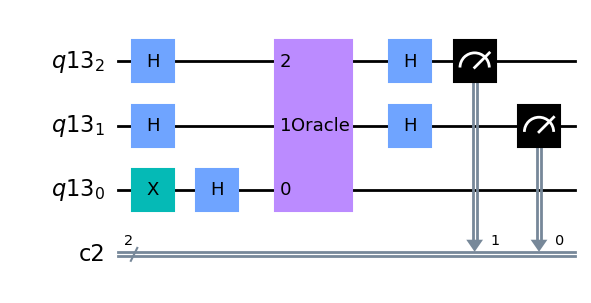

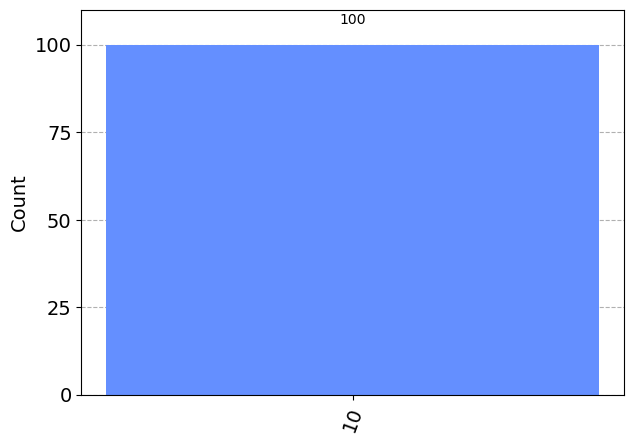

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram

#Creamos el operador oráculo
qreg = QuantumRegister(3)
creg = ClassicalRegister(2)
oraculo = QuantumCircuit(qreg,name="Oracle")

oraculo.barrier()
oraculo.x(qreg[2])
oraculo.cx(qreg[2],qreg[0])
oraculo.x(qreg[2])
oraculo.barrier()

#Creamos el circuito
circ_deutsch = QuantumCircuit(qreg,creg)
circ_deutsch.x(0)
circ_deutsch.h(range(3))

circ_deutsch.append(oraculo,qreg)

circ_deutsch.h([2,1])

circ_deutsch.measure(qreg[2],creg[1])
circ_deutsch.measure(qreg[1],creg[0])

#Mostramos el circuito
display(circ_deutsch.draw("mpl",reverse_bits=True))

#Ejecutamos el circuito y visualizamos los resultados
job = execute(circ_deutsch,Aer.get_backend("qasm_simulator"),shots=100).result()
plot_histogram(job.get_counts())


Como podemos ver...

<h1><font color="#004D7F" size=5>Ejercicio</font></h1>

Comprobar si es balanceada o constante la función que representa el operador del fichero deutsch_jozsa_f_8_qubits.py. Para ello hay que ejecutar el fichero .py y hacer uso del circuito llamado uf_dj_8. Este operador consta de 9 qubits de entrada de los cuales 8 son las variables de la función que representa y 1 es de la salida de dicha función.

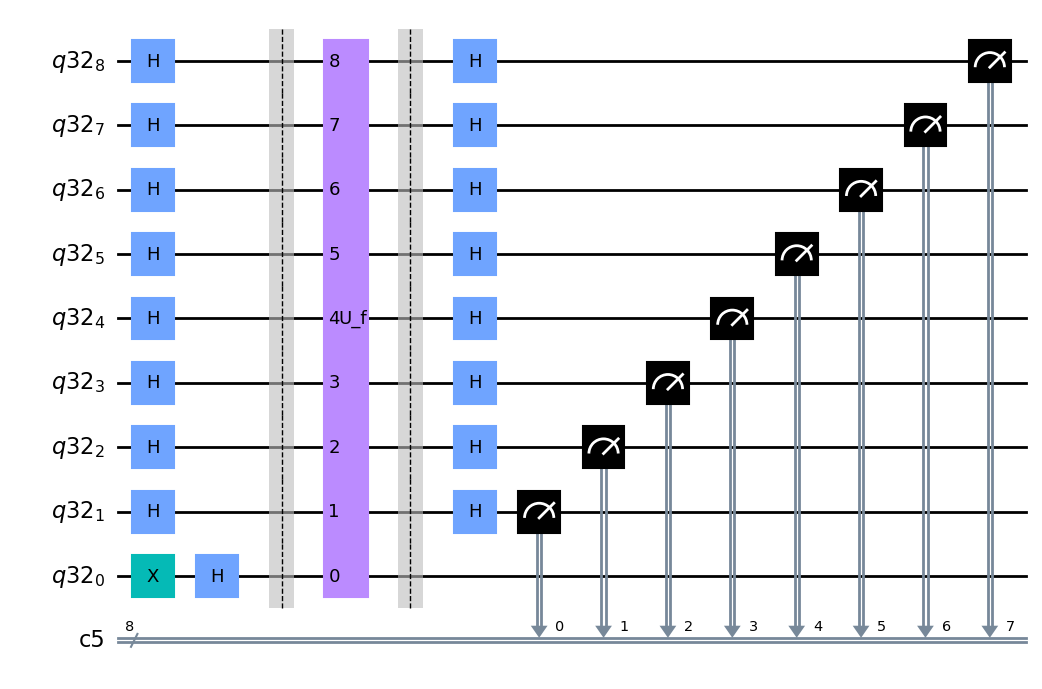

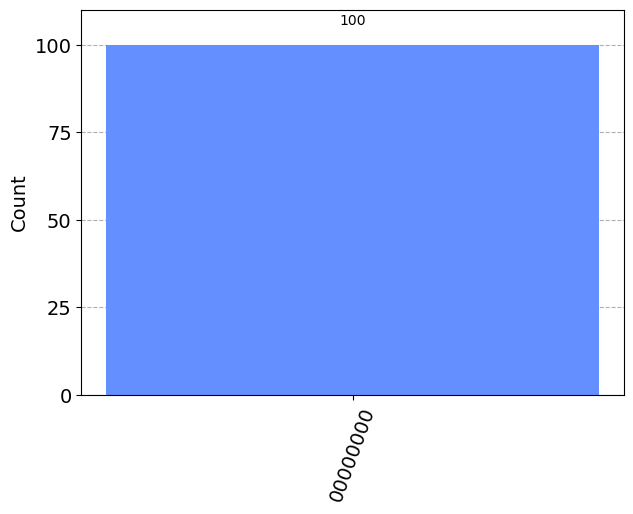

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram

#Ejecutamos el archivo
%run files/deutsch_jozsa_uf_9_qubits.py

#Creamos el operador oráculo
qreg = uf_dj_8_registry
creg = ClassicalRegister(8)
oraculo = uf_dj_8


#Creamos el circuito
circ_deutsch_j = QuantumCircuit(qreg,creg)
circ_deutsch_j.x(qreg[0])
circ_deutsch_j.h(qreg)

circ_deutsch_j.barrier()
circ_deutsch_j.append(oraculo,qreg)
circ_deutsch_j.barrier()

circ_deutsch_j.h([qreg[i] for i in range(1,9)])

circ_deutsch_j.measure([qreg[i] for i in range(1,9)],[creg[i] for i in range(8)])

#Mostramos el circuito
display(circ_deutsch_j.draw("mpl",reverse_bits=True))

#Ejecutamos el circuito y visualizamos los resultados
job = execute(circ_deutsch_j,Aer.get_backend("qasm_simulator"),shots=100).result()
plot_histogram(job.get_counts())


<h1><font color="#004D7F" size=5>Ejercicio</font></h1>

Comprobar si es balanceada o constante la función que representa el operador del fichero deutsch_jozsa_f_8_qubits.py. Para ello hay que ejecutar el fichero .py y hacer uso del circuito llamado uf_dj_8_2. Este operador consta de 9 qubits de entrada de los cuales 8 son las variables de la función que representa y 1 es de la salida de dicha función.

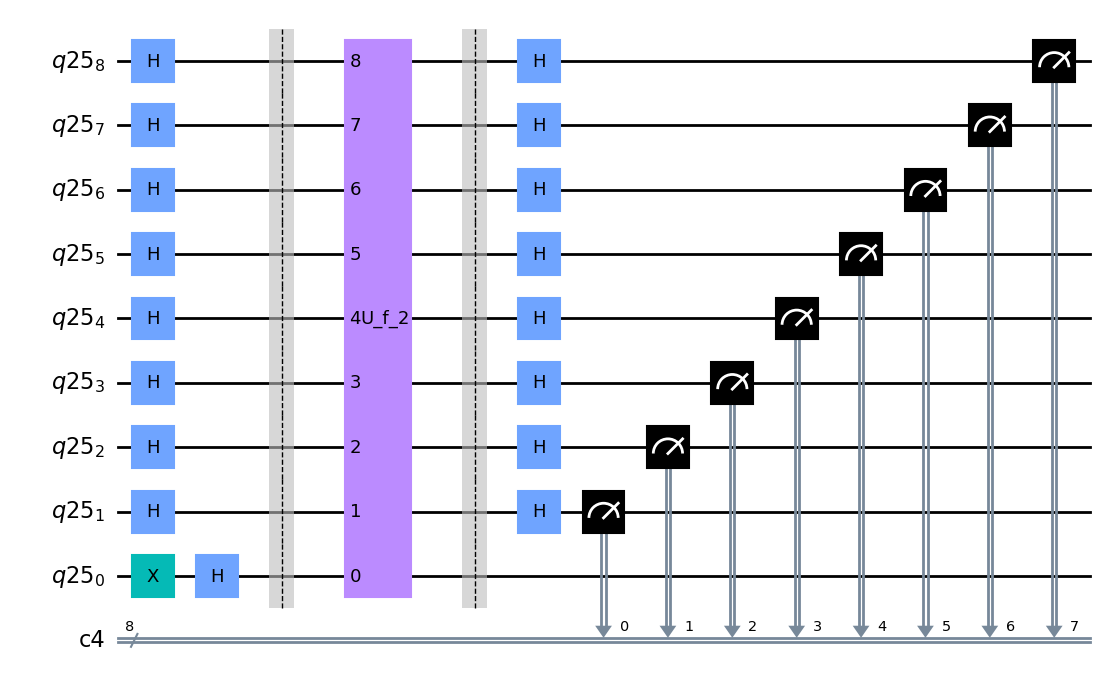

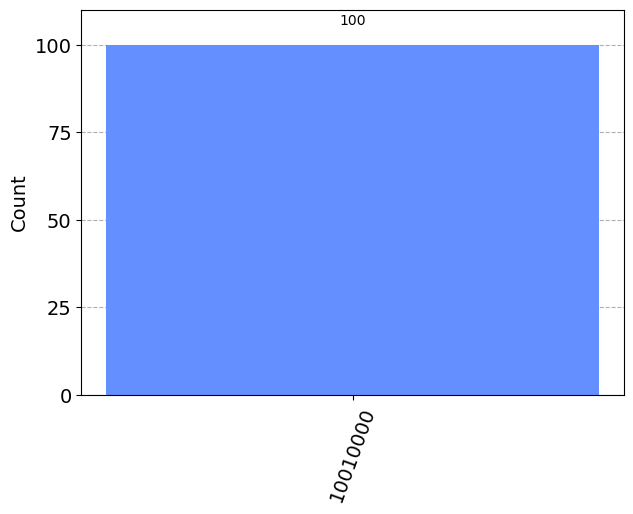

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram

#Ejecutamos el archivo
%run files/deutsch_jozsa_uf_9_qubits.py

#Creamos el operador oráculo
qreg = uf_dj_8_registry
creg = ClassicalRegister(8)
oraculo = uf_dj_8_2


#Creamos el circuito
circ_deutsch_j = QuantumCircuit(qreg,creg)
circ_deutsch_j.x(0)
circ_deutsch_j.h(range(9))

circ_deutsch_j.barrier()
circ_deutsch_j.append(oraculo,qreg)
circ_deutsch_j.barrier()

circ_deutsch_j.h(range(1,9))

circ_deutsch_j.measure([qreg[i] for i in range(1,9)],[creg[i] for i in range(8)])

#Mostramos el circuito
display(circ_deutsch_j.draw("mpl",reverse_bits=True))

#Ejecutamos el circuito y visualizamos los resultados
job = execute(circ_deutsch_j,Aer.get_backend("qasm_simulator"),shots=100).result()
plot_histogram(job.get_counts())